In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("shopping_trends.csv")
print(data.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [3]:
print(data.isnull().sum())

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [4]:
print(data.shape)

(3900, 18)


In [5]:
print(data.describe())

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


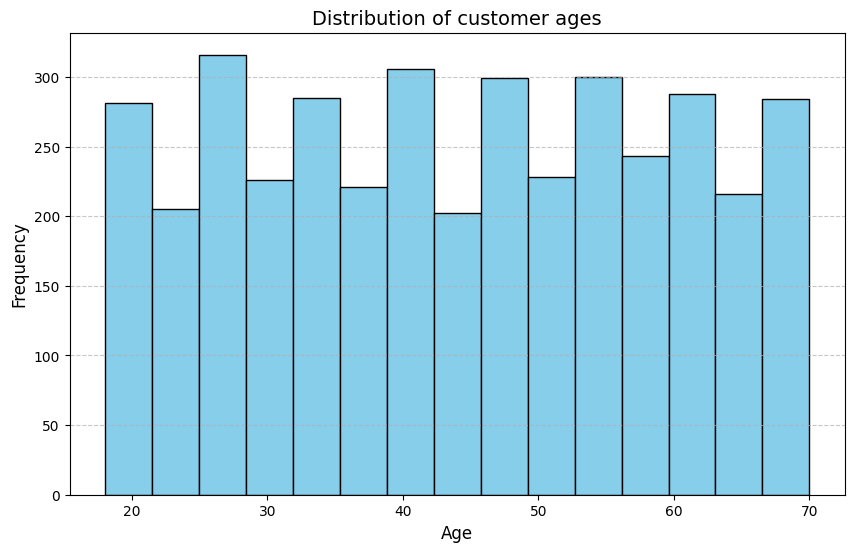

In [6]:
plt.figure(figsize=(10,6))
plt.hist(data["Age"],bins=15 , color="skyblue",edgecolor="black")
plt.title("Distribution of customer ages",fontsize=14)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.grid(axis= "y",linestyle="--",alpha=0.7)
plt.show()

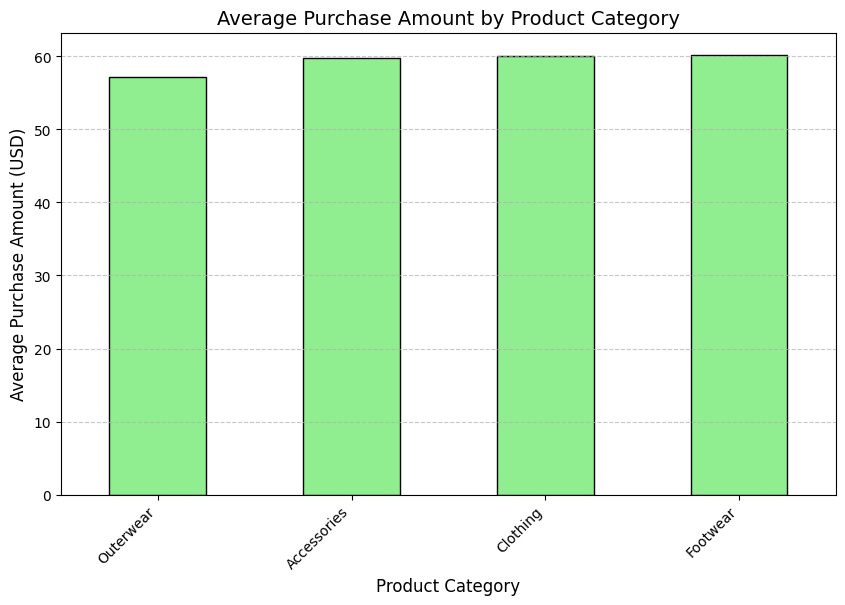

In [7]:
avg_purchase_by_category = data.groupby('Category')['Purchase Amount (USD)'].mean()

plt.figure(figsize=(10, 6))
avg_purchase_by_category.sort_values().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Purchase Amount by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

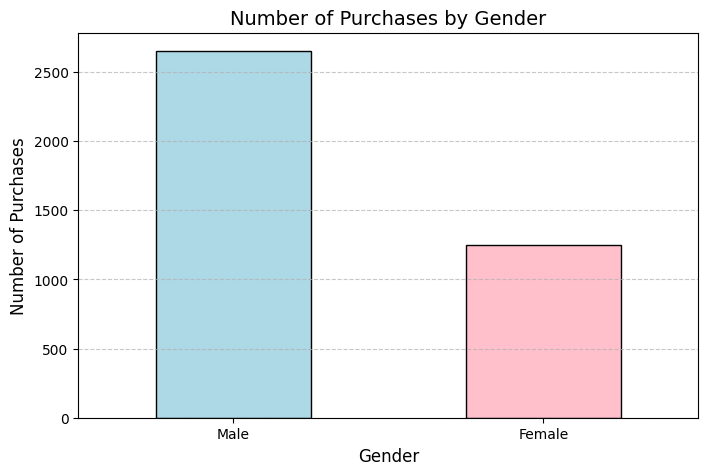

('Male', 2652)

In [8]:
purchases_by_gender = data['Gender'].value_counts()

plt.figure(figsize=(8, 5))
purchases_by_gender.plot(kind='bar', color=['lightblue', 'pink'], edgecolor='black')
plt.title('Number of Purchases by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

highest_gender = purchases_by_gender.idxmax()
highest_purchases = purchases_by_gender.max()

highest_gender, highest_purchases

In [9]:
most_common_items = data.groupby('Category')['Item Purchased'].agg(lambda x: x.value_counts().idxmax())

print(most_common_items)

Category
Accessories    Jewelry
Clothing        Blouse
Footwear       Sandals
Outerwear       Jacket
Name: Item Purchased, dtype: object


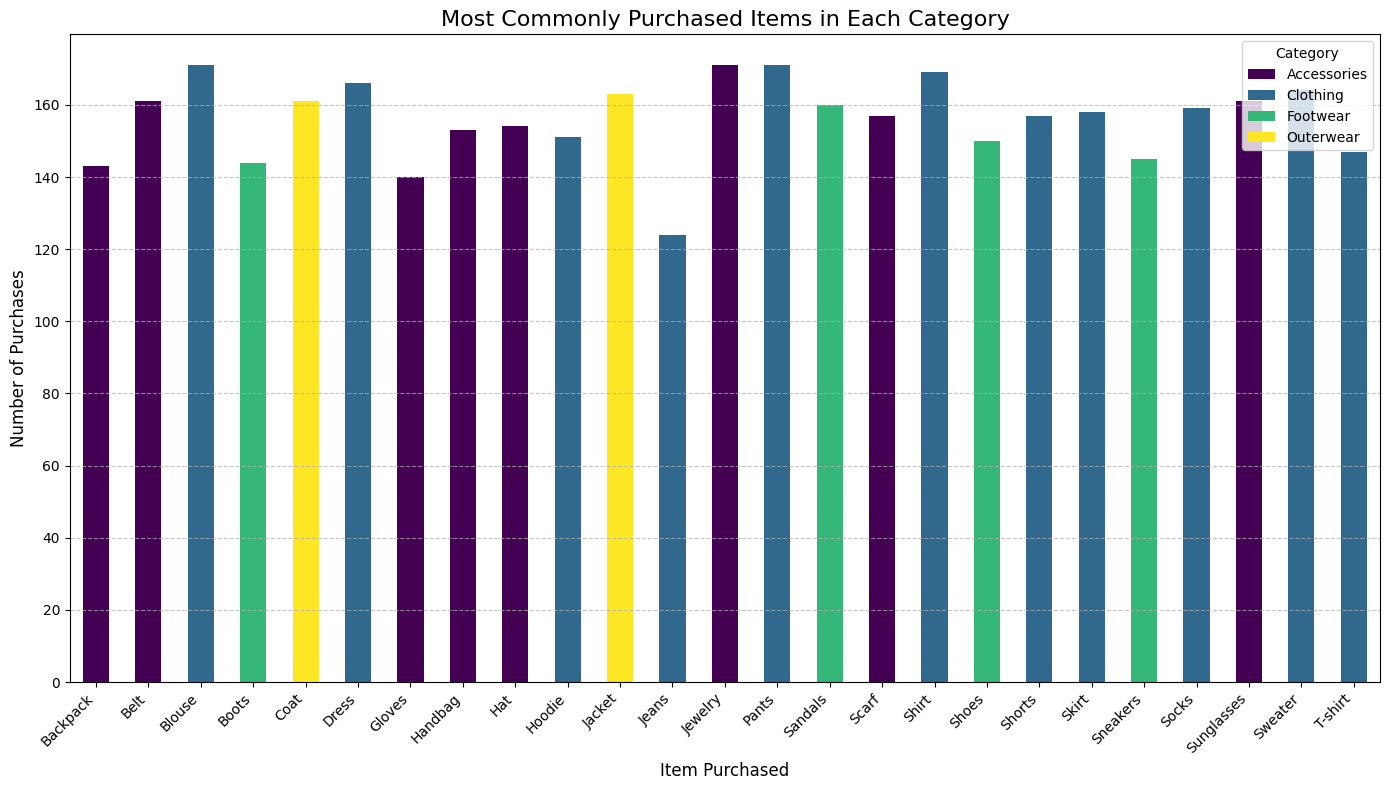

In [44]:
item_category_analysis = data.groupby(['Category', 'Item Purchased']).size().reset_index(name='Count')

item_pivot = item_category_analysis.pivot(index='Item Purchased', columns='Category', values='Count').fillna(0)

item_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.title('Most Commonly Purchased Items in Each Category', fontsize=16)
plt.xlabel('Item Purchased', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', fontsize=10, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


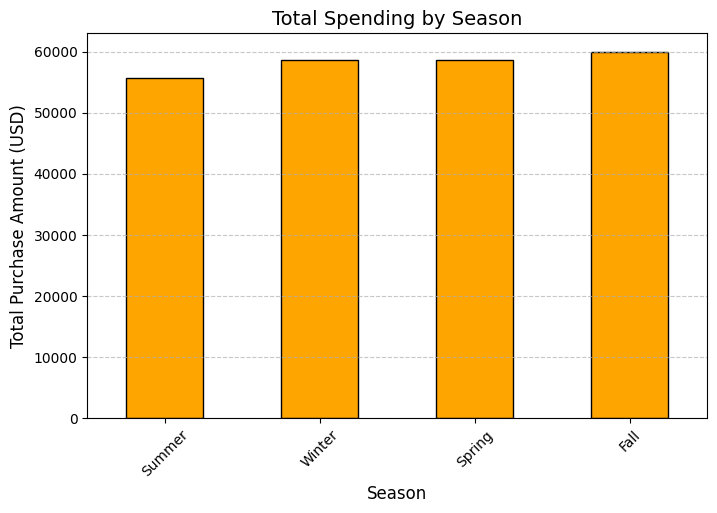

In [21]:
spending_by_season = data.groupby('Season')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(8, 5))
spending_by_season.sort_values().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Total Spending by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

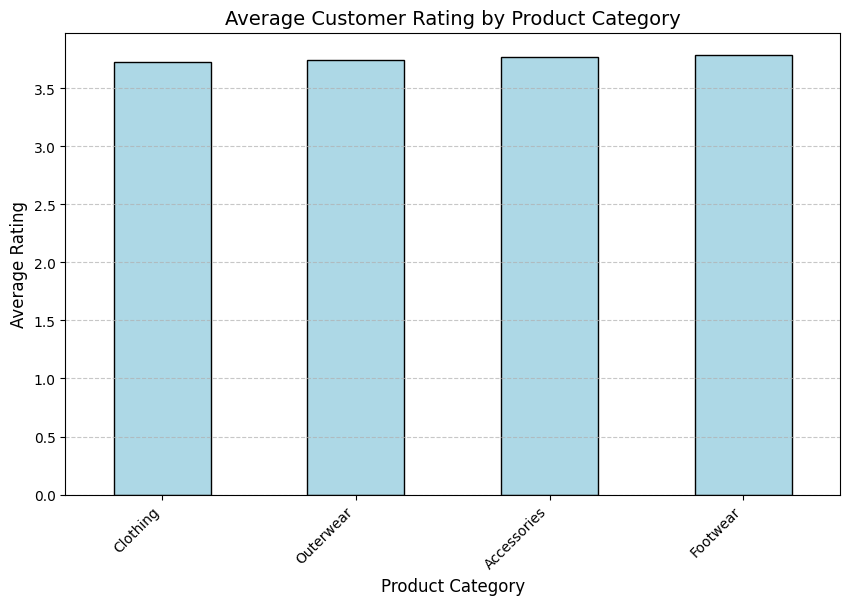

In [11]:
avg_rating_by_category = data.groupby('Category')['Review Rating'].mean()

plt.figure(figsize=(10, 6))
avg_rating_by_category.sort_values().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Customer Rating by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

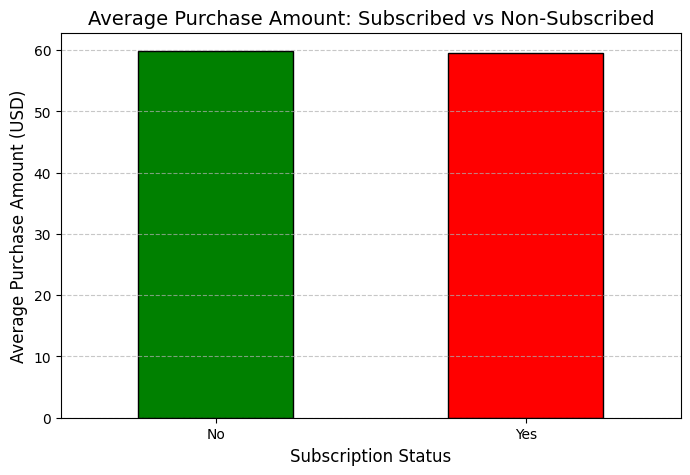

Subscription Status  Frequency of Purchases
No                   Every 3 Months            430
                     Quarterly                 423
                     Annually                  412
                     Bi-Weekly                 407
                     Monthly                   404
                     Fortnightly               389
                     Weekly                    382
Yes                  Annually                  160
                     Weekly                    157
                     Every 3 Months            154
                     Fortnightly               153
                     Monthly                   149
                     Bi-Weekly                 140
                     Quarterly                 140
Name: count, dtype: int64


In [20]:
purchase_behavior = data.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

plt.figure(figsize=(8, 5))
purchase_behavior.plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title('Average Purchase Amount: Subscribed vs Non-Subscribed', fontsize=14)
plt.xlabel('Subscription Status', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

frequency_behavior = data.groupby('Subscription Status')['Frequency of Purchases'].value_counts()

print(frequency_behavior)

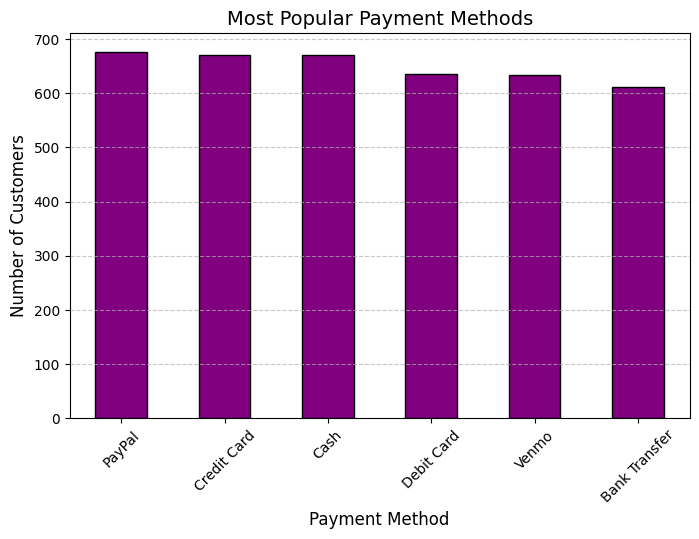

The most popular payment method is PayPal with 677 customers.


In [19]:
payment_method_counts = data['Payment Method'].value_counts()

plt.figure(figsize=(8, 5))
payment_method_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Most Popular Payment Methods', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

most_popular_payment = payment_method_counts.idxmax()
most_popular_payment_count = payment_method_counts.max()

print(f"The most popular payment method is {most_popular_payment} with {most_popular_payment_count} customers.")

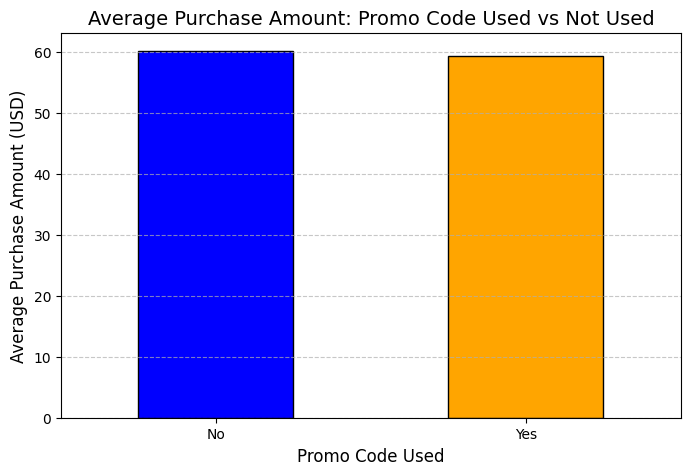

Promo Code Used
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64


In [18]:
promo_code_comparison = data.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()

plt.figure(figsize=(8, 5))
promo_code_comparison.plot(kind='bar', color=['blue', 'orange'], edgecolor='black')
plt.title('Average Purchase Amount: Promo Code Used vs Not Used', fontsize=14)
plt.xlabel('Promo Code Used', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(promo_code_comparison)

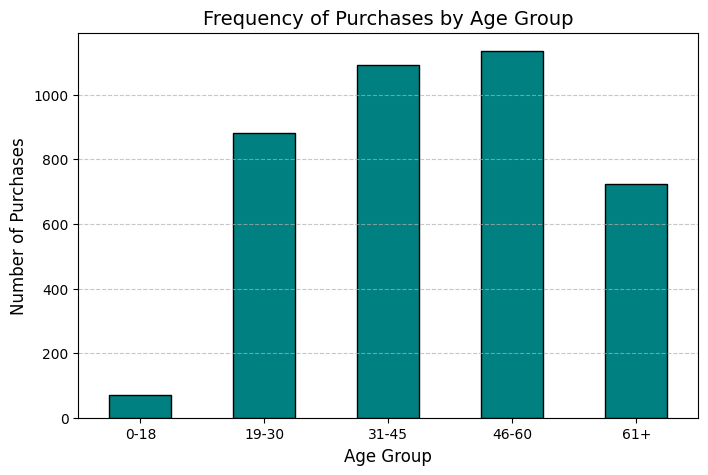

In [17]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

purchase_frequency_by_age_group = data['Age Group'].value_counts()

plt.figure(figsize=(8, 5))
purchase_frequency_by_age_group.sort_index().plot(kind='bar', color='teal', edgecolor='black')
plt.title('Frequency of Purchases by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [40]:
size_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4} 
data['Size'] = data['Size'].map(size_mapping)

In [41]:
data['Purchase Amount (USD)'] = pd.to_numeric(data['Purchase Amount (USD)'], errors='coerce')
data = data.dropna(subset=['Purchase Amount (USD)'])

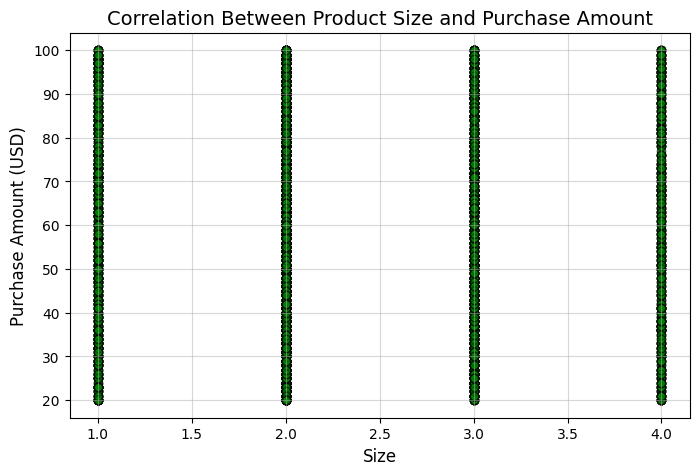

Correlation between Product Size and Purchase Amount: -0.02


In [42]:
correlation = data['Size'].corr(data['Purchase Amount (USD)'])

plt.figure(figsize=(8, 5))
plt.scatter(data['Size'], data['Purchase Amount (USD)'], alpha=0.6, color='green', edgecolor='black')
plt.title('Correlation Between Product Size and Purchase Amount', fontsize=14)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

print(f"Correlation between Product Size and Purchase Amount: {correlation:.2f}")


       Category  Shipping Type  Counts
5   Accessories   Store Pickup     217
10     Clothing       Standard     297
14     Footwear  Free Shipping     122
20    Outerwear  Free Shipping      64


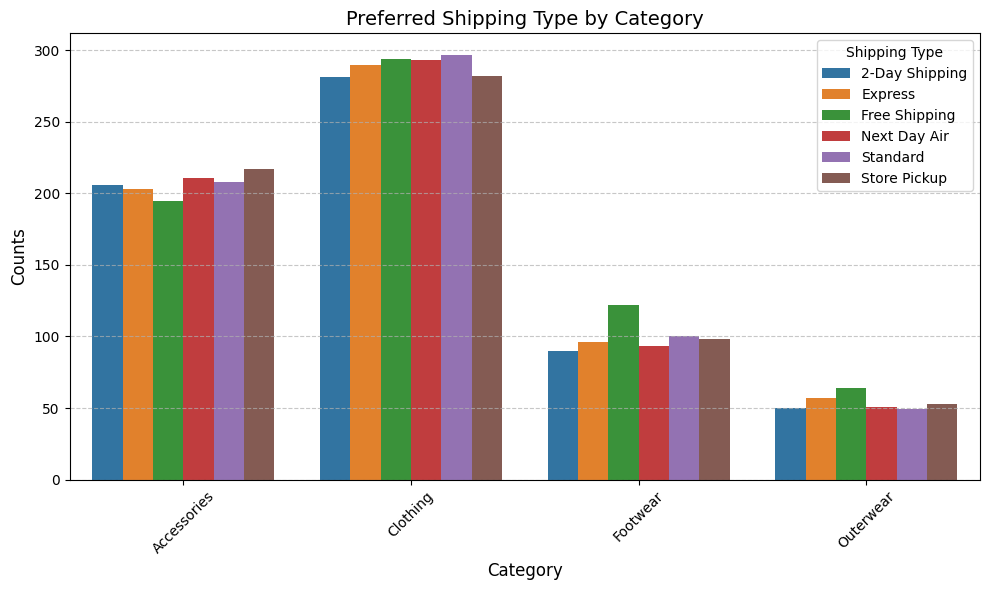

In [36]:
shipping_preference = data.groupby(['Category', 'Shipping Type']).size().reset_index(name='Counts')

preferred_shipping = shipping_preference.loc[shipping_preference.groupby('Category')['Counts'].idxmax()]

print(preferred_shipping)

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Counts', hue='Shipping Type', data=shipping_preference)
plt.title('Preferred Shipping Type by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Shipping Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

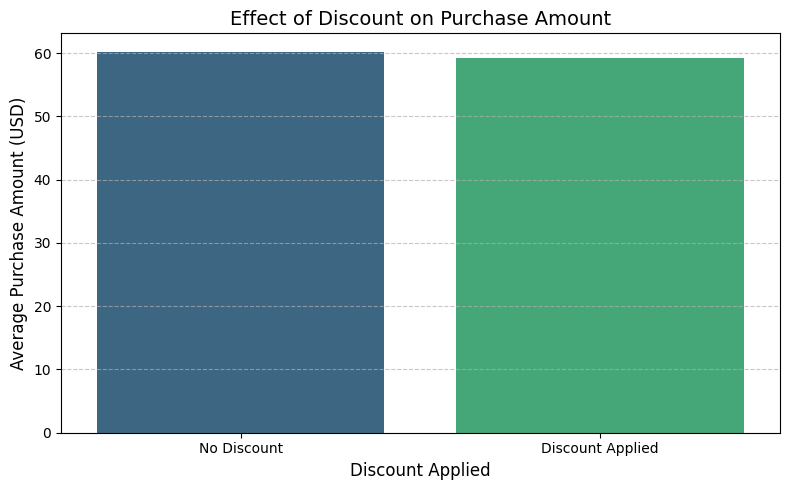

In [12]:
discount_effect = data.groupby('Discount Applied')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Discount Applied', 
    y='Purchase Amount (USD)', 
    data=discount_effect, 
    hue='Discount Applied',
    palette='viridis'
)

plt.title('Effect of Discount on Purchase Amount', fontsize=14)
plt.xlabel('Discount Applied', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.xticks([0, 1], ['No Discount', 'Discount Applied'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

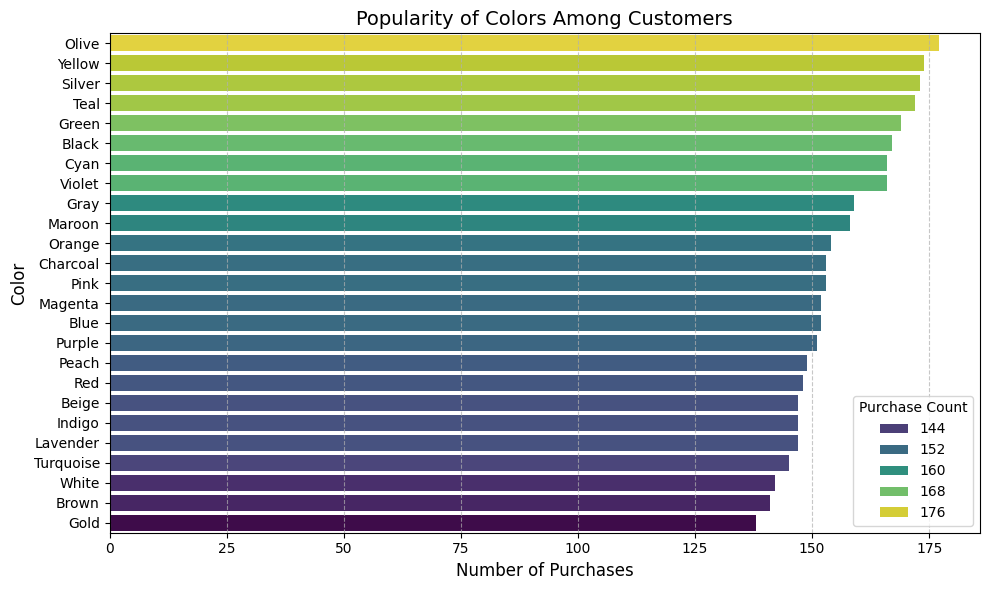

In [24]:
color_popularity = data['Color'].value_counts().reset_index()
color_popularity.columns = ['Color', 'Purchase Count']

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Purchase Count', 
    y='Color', 
    data=color_popularity,
    hue='Purchase Count',
    palette='viridis'
)

plt.title('Popularity of Colors Among Customers', fontsize=14)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Color', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
average_previous_purchases = data['Previous Purchases'].mean()

print(f"Average Number of Previous Purchases: {average_previous_purchases:.2f}")

Average Number of Previous Purchases: 25.35


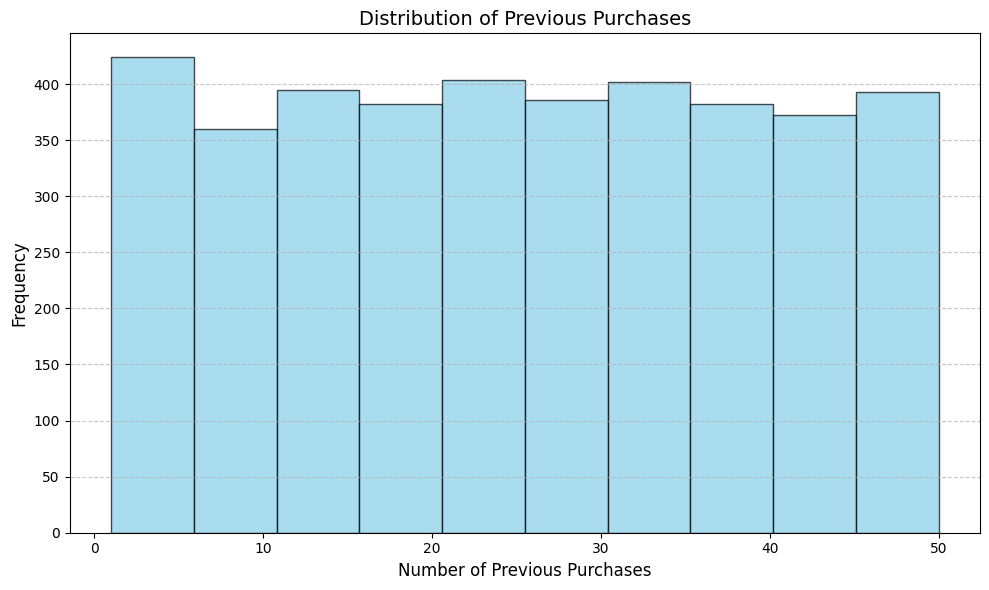

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(data['Previous Purchases'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Previous Purchases', fontsize=14)
plt.xlabel('Number of Previous Purchases', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

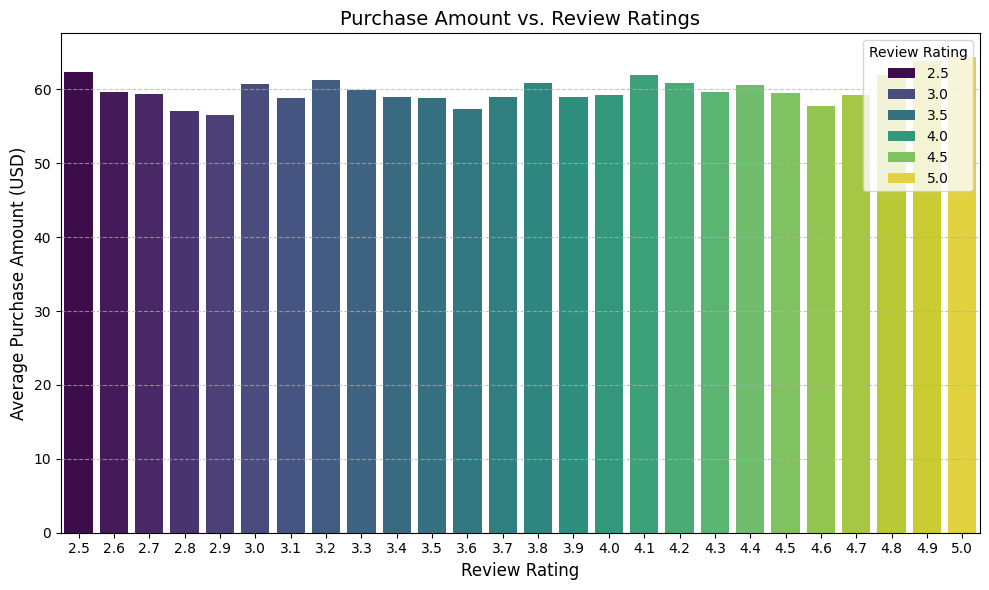

In [23]:
rating_analysis = data.groupby('Review Rating')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Review Rating', 
    y='Purchase Amount (USD)', 
    data=rating_analysis,
    hue='Review Rating',
    palette='viridis'
)

plt.title('Purchase Amount vs. Review Ratings', fontsize=14)
plt.xlabel('Review Rating', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


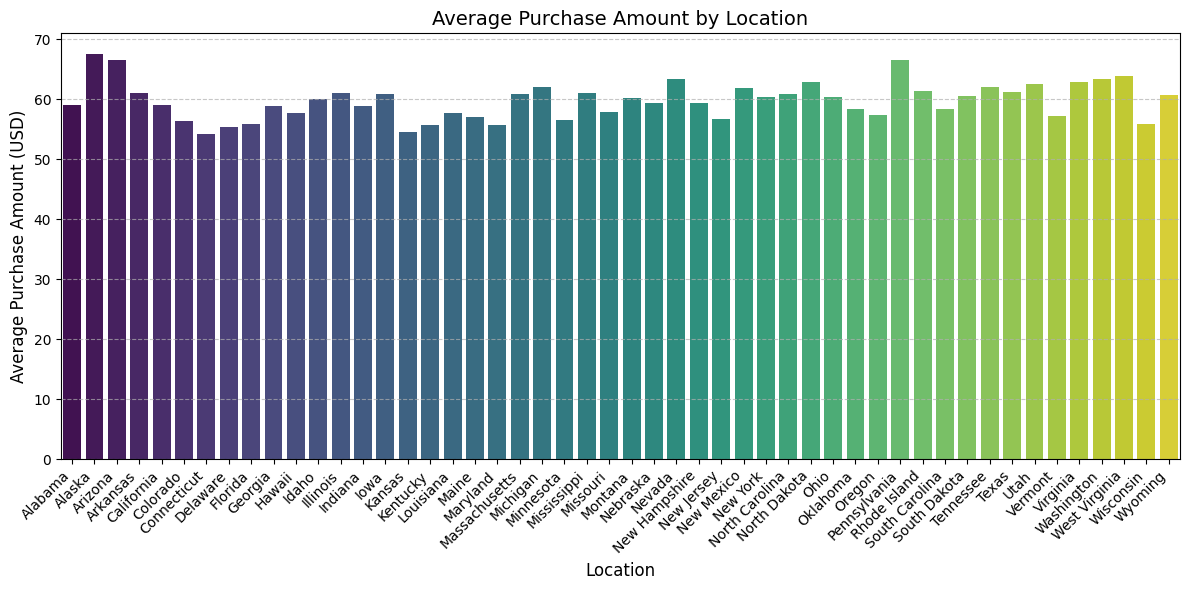

In [31]:
location_analysis = data.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Location', 
    y='Purchase Amount (USD)', 
    data=location_analysis, 
    hue='Location',
    palette='viridis'
)

plt.title('Average Purchase Amount by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

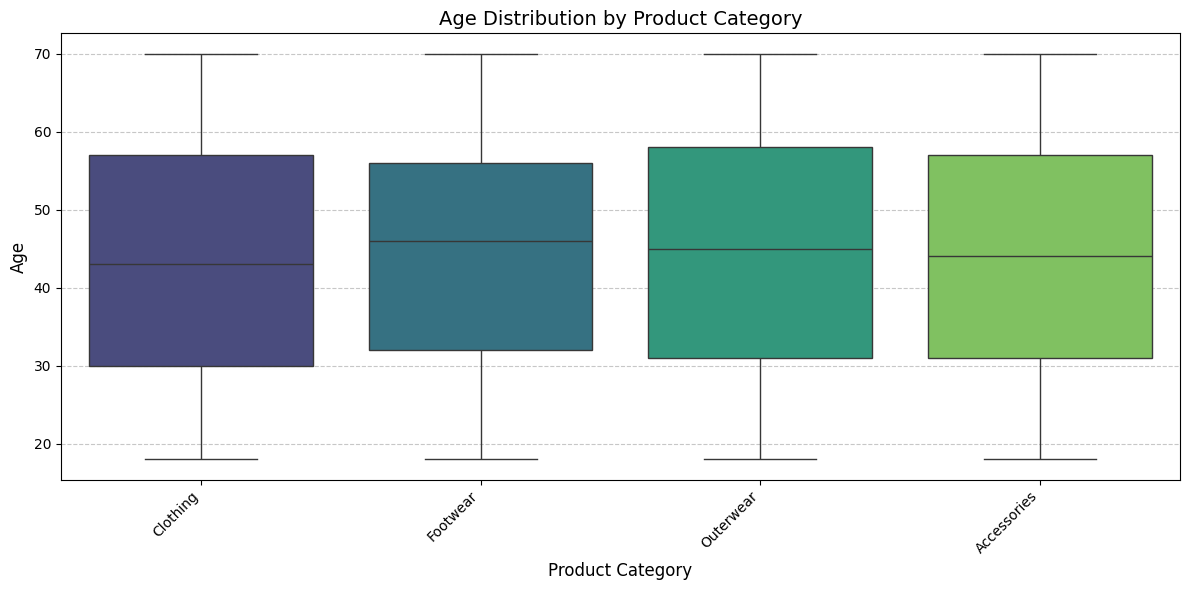

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Category', 
    y='Age', 
    data=data, 
    hue='Category', 
    palette='viridis'
)

plt.title('Age Distribution by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

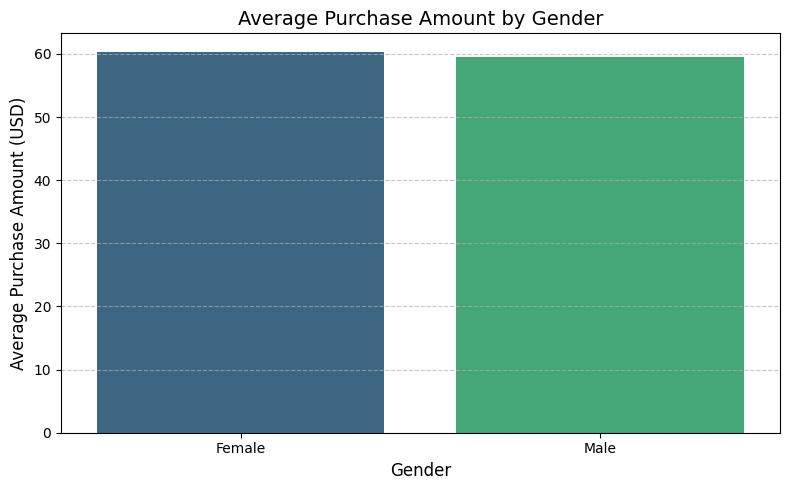

In [36]:
gender_analysis = data.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Gender', 
    y='Purchase Amount (USD)', 
    data=gender_analysis, 
    hue='Gender',
    palette='viridis'
)

plt.title('Average Purchase Amount by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()